# t-SNE

Page 12

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn import datasets
from sklearn import manifold

In [7]:
%matplotlib inline

`sklearn.manifold` contains various dimensionality reduction/embedding techniques such as t-SNE, isomap. etc. See `help("sklearn.manifold")`

In [8]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

## Examination of the data

The data consists of pixel values (as an array) and targets (that should be converted to integer type). An array is of length 784 since each pixel is 28x28.

In [10]:
len(data)

2

In [16]:
#Data points for each pixel
data[0].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Target values; will be converted to int
data[1][1:10]

1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [19]:
pixel_values, targets = data

In [21]:
targets = targets.astype(int)

## Plotting the first image

We draw the first image by taking the first row of pixel values and reshaping them to their original shape and plotting them on matplotlib. But first we convert the dataframe to an array.

In [40]:
pixel_values = pixel_values.to_numpy()

In [46]:
single_image = pixel_values[0,:].reshape(28,28)

In [48]:
targets[0]

5

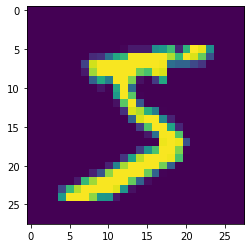

In [47]:
plt.imshow(single_image)

## Perform t-SNE

We initialise t-SNE with only two dimensions (we could have done more dimensions similar to PCA) so that we can plot the results on a 2D graph.

In [49]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [50]:
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [51]:
transformed_data

array([[ -5.281551 , -28.952768 ],
       [-26.105896 , -68.06932  ],
       [-42.503582 ,  35.58039  ],
       ...,
       [ 13.466378 ,  47.369007 ],
       [ -2.4357524,   7.983772 ],
       [ -4.2482643, -13.26691  ]], dtype=float32)

In [57]:
tsne_df = pd.DataFrame(transformed_data, columns=["x","y"])

In [58]:
tsne_df

,x,y
0,-5.281551,-28.952768
1,-26.105896,-68.069321
2,-42.503582,35.580391
3,38.893967,26.663395
4,-14.770573,35.433247
...,...,...
2995,9.038110,58.850792
2996,-29.405334,-60.951775
2997,13.466378,47.369007
2998,-2.435752,7.983772


In [59]:
tsne_df["targets"] = targets

In [61]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


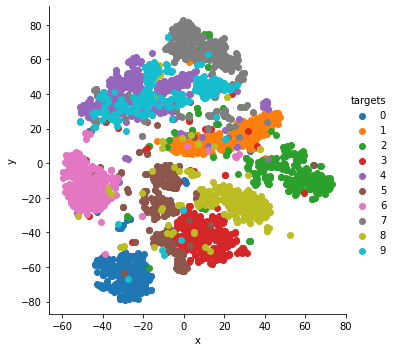

In [72]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=5)

grid.map(plt.scatter,"x","y").add_legend()

# Cross Validation

Page 15

In [74]:
red_wine = pd.read_csv("./winequality-red.csv")

In [76]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Correcting the quality column

The `quality` column requires re-mapping to values ranging 0-5. We create a mapping dictionary for this.

In [78]:
red_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [79]:
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}

In [81]:
red_wine["quality"] = red_wine.quality.map(quality_mapping)

In [83]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [104]:
red_wine.shape

(1599, 12)

## Shuffling, train/test split

We shuffle the entire dataframe, reset the row indices since they'll change after shuffling, then select the top 1,000 rows as train set and the rest as test set. Alternatively, we could have used the train_test_split() function from sklearn for this.

In [97]:
red_wine = red_wine.sample(frac=1, random_state=123).reset_index(drop=True)

If `drop=True` is not specified, the resulting column will contain two indices - the original and the new row indices.

In [98]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,3
1,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,2
2,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,2
3,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,3
4,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,2


In [199]:
red_wine_train = red_wine.head(1000)

In [200]:
red_wine_test = red_wine.tail(599)

## Train a decision tree

In [106]:
from sklearn import tree
from sklearn import metrics

In [107]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [119]:
cols = red_wine.columns[:10]

In [126]:
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

In [121]:
clf.fit(X=red_wine_train[cols], y=red_wine_train['quality'])

DecisionTreeClassifier(max_depth=3)

## Measure its validation accuracy

In [124]:
test_predictions = clf.predict(X=red_wine_test[cols])

In [125]:
metrics.accuracy_score(y_pred=test_predictions, y_true=red_wine_test.quality)

0.5292153589315526

### Measure accuracy over many depths

In [130]:
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    clf.fit(red_wine_train[cols], red_wine_train.quality)
    
    train_predictions = clf.predict(red_wine_train[cols])
    test_predictions = clf.predict(red_wine_test[cols])
    
    training_accuracy = metrics.accuracy_score(y_pred=train_predictions, y_true=red_wine_train.quality)
    testing_accuracy = metrics.accuracy_score(y_pred=test_predictions, y_true=red_wine_test.quality)
    
    train_accuracies.append(training_accuracy)
    test_accuracies.append(testing_accuracy)

In [134]:
train_accuracies[:10]

[0.5, 0.52, 0.571, 0.581, 0.619, 0.663, 0.707, 0.748, 0.785, 0.828]

In [136]:
test_accuracies[:5]

[0.5,
 0.4941569282136895,
 0.5292153589315526,
 0.5292153589315526,
 0.5575959933222037]

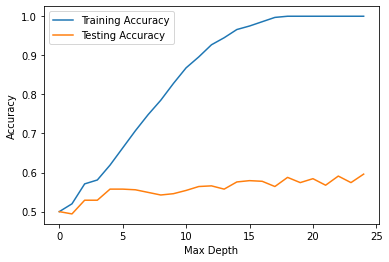

In [143]:
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(test_accuracies, label = "Testing Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()

The above is a sign of overfitting where the accuracy of the test set does not change over time or at times reduces.

## Using cross-validation to improve test accuracy

We create cross-validation folds from the training set as follows:

In [144]:
from sklearn import model_selection

In [201]:
# Create a column indicating the fold and assign a default value of -1
red_wine_train["kfold"] = -1

<ipython-input-201-e8d305e1200f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_wine_train["kfold"] = -1


In [202]:
red_wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,3,-1
1,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,2,-1
2,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,2,-1
3,8.2,0.230,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,3,-1
4,7.9,0.370,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,2,-1
996,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,1,-1
997,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,3,-1
998,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,3,-1


In [203]:
#Shuffle the entire dataset
red_wine_train = red_wine_train.sample(frac=1).reset_index(drop=True)

In [204]:
red_wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.5,0.52,0.11,1.50,0.079,11.0,39.0,0.99680,3.42,0.58,9.6,2,-1
1,8.9,0.48,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,2,-1
2,6.9,0.57,0.00,2.80,0.081,21.0,41.0,0.99518,3.41,0.52,10.8,2,-1
3,11.5,0.59,0.59,2.60,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,3,-1
4,7.8,0.59,0.33,2.00,0.074,24.0,120.0,0.99680,3.25,0.54,9.4,2,-1


In [205]:
#Initiate kfold()
kf = model_selection.KFold(n_splits=5)

In [206]:
#Allocate rows in the train set to folds
for fold,(trn_, val_) in enumerate(kf.split(X=red_wine_train)):
    red_wine_train.loc[val_,"kfold"]=fold

In [207]:
red_wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.5,0.52,0.11,1.50,0.079,11.0,39.0,0.99680,3.42,0.58,9.6,2,0
1,8.9,0.48,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,2,0
2,6.9,0.57,0.00,2.80,0.081,21.0,41.0,0.99518,3.41,0.52,10.8,2,0
3,11.5,0.59,0.59,2.60,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,3,0
4,7.8,0.59,0.33,2.00,0.074,24.0,120.0,0.99680,3.25,0.54,9.4,2,0


In [208]:
red_wine_train.kfold.value_counts()

0    200
1    200
2    200
3    200
4    200
Name: kfold, dtype: int64

In [213]:
enumerate(kf.split(X=red_wine_train))